# Dev test

In [1]:
import os
import micromagneticdata as md

In [2]:
dirname = os.path.join('..', '..', 'micromagneticdata', 'tests')

In [3]:
data = md.Data(name='test_sample', dirname=dirname)

In [4]:
data.n

6

In [5]:
drive = data.drive(0)

In [6]:
drive.n

25

In [7]:
data.info

,drive_number,date,time,driver,t,n
0,0,2020-06-14,22:40:45,TimeDriver,2.500000e-11,25.0
1,1,2020-06-14,22:40:47,TimeDriver,1.500000e-11,15.0
2,2,2020-06-14,22:40:49,TimeDriver,5.000000e-12,10.0
3,3,2020-06-14,22:40:51,MinDriver,NaN,NaN
4,4,2020-06-14,22:40:53,TimeDriver,5.000000e-12,5.0
5,5,2020-06-14,22:40:55,MinDriver,NaN,NaN


In [8]:
data.selector()

BoundedIntText(value=0, description='drive', max=6)

In [9]:
d = md.Drive(name='test_sample', number=0, dirname=dirname)

In [10]:
d.info

{'drive_number': 0,
 'date': '2020-06-14',
 'time': '22:40:45',
 'driver': 'TimeDriver',
 'args': {'t': 2.5e-11, 'n': 25}}

In [11]:
print(d.mif)

# MIF 2.2

SetOptions {
  basename test_sample
  scalar_output_format %.12g
  scalar_field_output_format {text %#.15g}
  vector_field_output_format {text %#.15g}
}

# BoxAtlas for main_atlas
Specify Oxs_BoxAtlas:main_atlas {
  xrange { 0.0 1e-07 }
  yrange { 0.0 5e-08 }
  zrange { 0.0 2e-08 }
  name main
}

# RectangularMesh
Specify Oxs_RectangularMesh:mesh {
  cellsize { 5e-09 5e-09 5e-09 }
  atlas :main_atlas
}

# UniformExchange
Specify Oxs_UniformExchange {
  A 1.3e-11
}

# FixedZeeman
Specify Oxs_FixedZeeman {
  field {1000000.0 0.0 200000.0}
}

# m0 file
Specify Oxs_FileVectorField:m0 {
  file m0.omf
  atlas :main_atlas
}

# m0_norm
Specify Oxs_VecMagScalarField:m0_norm {
    field :m0
}

# RungeKuttaEvolver
Specify Oxs_RungeKuttaEvolve:evolver {
  alpha 0.02
  gamma_G 221276.14872118403
}

# TimeDriver
Specify Oxs_TimeDriver {
  evolver :evolver
  mesh :mesh
  Ms :m0_norm
  m0 :m0
  stopping_time 1e-12
  stage_count 25
}

Destination table mmArchive
Destination mags mmArchive
De

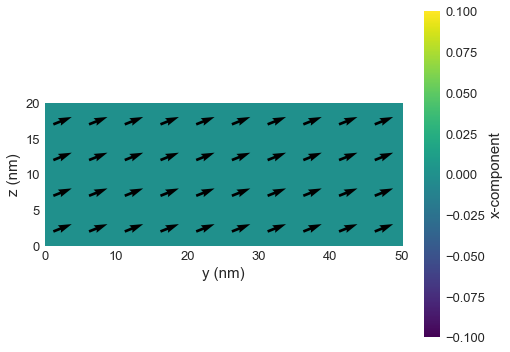

In [12]:
d.m0.plane('x').mpl()

In [13]:
d.table.data

,E,E_calc_count,max_dm/dt,dE/dt,delta_E,E_exchange,max_spin_ang,stage_max_spin_ang,run_max_spin_ang,E_zeeman,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,-7.927158e-18,37.0,12887.982100,-4.597480e-07,-3.443143e-19,0.0,0.0,0.0,0.0,-7.927158e-18,6.0,6.0,0.0,-0.034481,0.823225,0.566668,7.487269e-13,1.000000e-12
1,-8.386742e-18,44.0,12883.356937,-4.594181e-07,-4.595843e-19,0.0,0.0,0.0,0.0,-8.386742e-18,8.0,1.0,1.0,-0.063349,0.676335,0.733865,1.000000e-12,2.000000e-12
2,-8.845987e-18,51.0,12878.473079,-4.590698e-07,-4.592452e-19,0.0,0.0,0.0,0.0,-8.845987e-18,10.0,1.0,2.0,-0.084921,0.495286,0.864569,1.000000e-12,3.000000e-12
3,-9.304875e-18,58.0,12873.331018,-4.587033e-07,-4.588878e-19,0.0,0.0,0.0,0.0,-9.304875e-18,12.0,1.0,3.0,-0.097888,0.289284,0.952225,1.000000e-12,4.000000e-12
4,-9.763387e-18,65.0,12867.931274,-4.583186e-07,-4.585121e-19,0.0,0.0,0.0,0.0,-9.763387e-18,14.0,1.0,4.0,-0.101375,0.068795,0.992467,1.000000e-12,5.000000e-12
5,-1.022151e-17,72.0,12862.274389,-4.579157e-07,-4.581183e-19,0.0,0.0,0.0,0.0,-1.022151e-17,16.0,1.0,5.0,-0.094992,-0.154991,0.983338,1.000000e-12,6.000000e-12
6,-1.067921e-17,79.0,12856.360934,-4.574947e-07,-4.577064e-19,0.0,0.0,0.0,0.0,-1.067921e-17,18.0,1.0,6.0,-0.078850,-0.370724,0.925390,1.000000e-12,7.000000e-12
7,-1.113649e-17,86.0,12850.191502,-4.570558e-07,-4.572764e-19,0.0,0.0,0.0,0.0,-1.113649e-17,20.0,1.0,7.0,-0.053553,-0.567472,0.821649,1.000000e-12,8.000000e-12
8,-1.159332e-17,93.0,12843.766712,-4.565988e-07,-4.568284e-19,0.0,0.0,0.0,0.0,-1.159332e-17,22.0,1.0,8.0,-0.020172,-0.735279,0.677464,1.000000e-12,9.000000e-12
9,-1.204968e-17,100.0,12837.087209,-4.561240e-07,-4.563626e-19,0.0,0.0,0.0,0.0,-1.204968e-17,24.0,1.0,9.0,0.019814,-0.865666,0.500230,1.000000e-12,1.000000e-11


In [14]:
d.n

25

In [16]:
d.step(0)

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), bc='', subregions={}), dim=3)

In [17]:
for i in d:
    print(i)

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), bc='', subregions={}), dim=3)
Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), bc='', subregions={}), dim=3)
Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), bc='', subregions={}), dim=3)
Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), bc='', subregions={}), dim=3)
Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), bc='', subregions={}), dim=3)
Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), bc='', subregions={}), dim=3)
Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), bc='', subregions={}), dim=3)
Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-07, 5e-08, 2e-08)), n=(20, 10, 4), bc='', subregions={}), dim=3)
Field(mesh=Mesh(region=R

In [18]:
d.slider()

IntSlider(value=0, description='step', max=24)